In [41]:
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

In [42]:
reg = 1
train_file = "a9a"
valid_file = "a9at"
num_iter = 100  # 最大迭代次数
k = 100  # 每次训练的batch

In [43]:
def classify(label):
    if label == 1:
        return 1
    else:
        return 0

In [44]:
def nag_stocGradAscent(dataMatrix, classLabels, X1, y1, weights, eta = 0.01, gamma = 0.9):
    # 训练及优化
    print('NAG start ^O^')
    new_weights = weights
    m, n = shape(dataMatrix)
    loss_valid = []
    monu = mat(np.zeros((n,2)))  # NAG
    for j in range(num_iter):
        loss = compute_loss(new_weights, X1, y1)
        loss_valid.append(float(loss))
        dataIndex = list(range(m))
        w_gradient = np.zeros((n, 2))  # n*2
        for i in range(k):
            temp_weights = new_weights - gamma * monu
            randIndex = int(random.uniform(0, len(dataIndex)))
            v = dataMatrix[randIndex, :]  # 1*n
            score = predict(temp_weights, v)  # 1*2
            correct_score = classify(classLabels[randIndex])
            for j in range(2):
                if j == correct_score:  # classify(label[i])=correct_score
                    continue
                margin = score[0, j] - correct_score + 1
                if margin > 0:
                    w_gradient[:, correct_score] = w_gradient[:, correct_score] - v
                    w_gradient[:, j] = w_gradient[:, j] + v
            del (dataIndex[randIndex])
        w_gradient /= k
        w_gradient += 2 * reg * new_weights
        monu = gamma * monu + eta * w_gradient
        new_weights = new_weights - monu
    print('final valid_error={0}'.format(float(loss)))

    return [new_weights, loss_valid]

In [45]:
def rmsp_stocGradAscent(dataMatrix, classLabels, X1, y1, weights, eta = 0.01, gamma = 0.9, eps = 1e-8):

    print('RMSProp start ^O^')
    new_weights = weights
    m, n = shape(dataMatrix)
    loss_valid = []
    g = mat(np.zeros((n, 2)))
    for j in range(num_iter):
        loss = compute_loss(new_weights, X1, y1)
        loss_valid.append(float(loss))
        dataIndex = list(range(m))
        epsilon = np.ones((n, 2)) * eps
        w_gradient = np.zeros((n, 2))  # n*2
        for i in range(k):
            randIndex = int(random.uniform(0, len(dataIndex)))
            v = dataMatrix[randIndex, :]  # 1*n
            score = predict(new_weights, v)  # 1*2
            correct_score = classify(classLabels[randIndex])
            for j in range(2):
                if j == correct_score:  # classify(label[i])=correct_score
                    continue
                margin = score[0, j] - correct_score + 1
                if margin > 0:
                    w_gradient[:, correct_score] = w_gradient[:, correct_score] - v
                    w_gradient[:, j] = w_gradient[:, j] + v
            del (dataIndex[randIndex])
        w_gradient /= k
        w_gradient += 2 * reg * new_weights
        g = gamma * g + (1 - gamma) * square(w_gradient)
        new_weights = new_weights - eta * w_gradient / sqrt(g + epsilon)
    print('final valid_error={0}'.format(float(loss)))

    return [new_weights, loss_valid]

In [46]:
def adadelta_stocGradAscent(dataMatrix, classLabels, X1, y1, weights, eta = 0.5, gamma = 0.95, eps = 1e-5):

    print('AdaDelta start ^O^')
    new_weights = weights
    m, n = shape(dataMatrix)
    loss_valid = []
    g = mat(np.zeros((n, 2)))
    delta = mat(np.zeros((n, 2)))  # delta
    for j in range(num_iter):
        loss = compute_loss(new_weights, X1, y1)
        loss_valid.append(float(loss))
        dataIndex = list(range(m))
        epsilon = np.ones((n, 2)) * eps
        w_gradient = np.zeros((n, 2))  # n*2
        for i in range(k):
            randIndex = int(random.uniform(0, len(dataIndex)))
            v = dataMatrix[randIndex, :]  # 1*n
            score = predict(new_weights, v)  # 1*2
            correct_score = classify(classLabels[randIndex])
            for j in range(2):
                if j == correct_score:  # classify(label[i])=correct_score
                    continue
                margin = score[0, j] - correct_score + 1
                if margin > 0:
                    w_gradient[:, correct_score] = w_gradient[:, correct_score] - v
                    w_gradient[:, j] = w_gradient[:, j] + v
            del (dataIndex[randIndex])
        w_gradient /= k
        w_gradient += 2 * reg * new_weights
        g = gamma * g + (1 - gamma) * square(w_gradient)
        dx = sqrt(delta + epsilon) / sqrt(g + epsilon)
        new_weights = new_weights - dx.A * w_gradient
        delta = gamma * delta + (1 - gamma) * square(dx.A * w_gradient)
    print('final valid_error={0}'.format(float(loss)))

    return [new_weights, loss_valid]

In [47]:
def adam_stocGradAscent(dataMatrix, classLabels, X1, y1, weights, eta = 0.01, gamma = 0.999, eps = 1e-8, beta = 0.9):

    print('Adam start ^O^')
    new_weights = weights
    m, n = shape(dataMatrix)
    loss_valid = []
    g = mat(np.zeros((n, 2)))
    moments = mat(np.zeros((n, 2)))  # delta
    for j in range(num_iter):
        loss = compute_loss(new_weights, X1, y1)
        loss_valid.append(float(loss))
        dataIndex = list(range(m))
        epsilon = np.ones((n, 2)) * eps
        w_gradient = np.zeros((n, 2))  # n*2
        for i in range(k):
            randIndex = int(random.uniform(0, len(dataIndex)))
            v = dataMatrix[randIndex, :]  # 1*n
            score = predict(new_weights, v)  # 1*2
            correct_score = classify(classLabels[randIndex])
            for j in range(2):
                if j == correct_score:  # classify(label[i])=correct_score
                    continue
                margin = score[0, j] - correct_score + 1
                if margin > 0:
                    w_gradient[:, correct_score] = w_gradient[:, correct_score] - v
                    w_gradient[:, j] = w_gradient[:, j] + v
            del (dataIndex[randIndex])
        w_gradient /= k
        w_gradient += 2 * reg * new_weights
        g = gamma * g + (1 - gamma) * square(w_gradient)
        moments = beta * moments + (1 - beta) * w_gradient
        alpha = eta * sqrt(1 - gamma ** (j + 1)) / (1 - beta ** (j + 1))
        new_weights = new_weights - alpha * moments / sqrt(g + epsilon)
    print('final valid_error={0}'.format(float(loss)))

    return [new_weights, loss_valid]

In [48]:
def predict(w,v):

    return v*w  # 1*M * M*2 = 1*2

In [49]:
def compute_loss(w, data, label):
    # 计算Loss函数值
    n, m = shape(data)
    loss = 0.0
    for i in range(n):
        v = data[i, :]  # 1*M
        score = predict(w, v)  # 1*2
        correct_score = classify(label[i])
        for j in range(2):
            if j == correct_score:
                continue
            margin = score[0, j]-correct_score+1
            if margin > 0:
                loss += margin
    loss /= n

    return loss

In [50]:
def get_data(filename):
    # 读入数据
    data = load_svmlight_file(filename)
    X = data[0].toarray()
    y = data[1]
    count = X.shape[0]
    if filename=='a9at':
        X = np.column_stack((X, np.zeros((count, 1))))
    np.c_[X, np.ones(count)]

    return [X, y]


In [51]:
def plot_loss(y1, y2, y3, y4):

    plt.plot(y1, label='NAG_loss')
    plt.plot(y2, label='RMSProp_loss')
    plt.plot(y3, label='AdaDelta_loss')
    plt.plot(y4, label='Adam_loss')
    plt.legend()
    plt.xlabel('iteration');
    plt.ylabel('Loss');
    plt.show()

In [52]:
def svm_classification():

    # 参数初始化
    X, y = get_data(train_file)
    X1, y1 = get_data(valid_file)
    m, n = shape(X)
    weights = mat(np.zeros((n, 2)))
    weights_nag, loss_nag = nag_stocGradAscent(X, y, X1, y1, weights)
    weights_rms, loss_rms = rmsp_stocGradAscent(X, y, X1, y1, weights)
    weights_delta, loss_delta = adadelta_stocGradAscent(X, y, X1, y1, weights)
    weights_adam, loss_adam = adam_stocGradAscent(X, y, X1, y1, weights)
    plot_loss(loss_nag, loss_rms, loss_delta, loss_adam)

NAG start ^O^
final valid_error=0.2527197823358365
RMSProp start ^O^
final valid_error=0.25973604055311444
AdaDelta start ^O^
final valid_error=0.24105599426162025
Adam start ^O^
final valid_error=0.2696012450839969


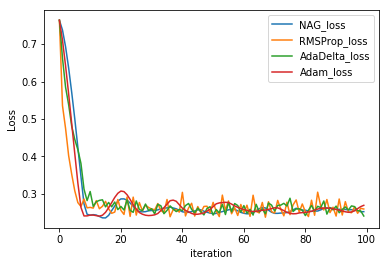

In [53]:
if __name__ == '__main__':

    svm_classification()